In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from osdatahub import Extent, FeaturesAPI, NGD
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['PROJ_NETWORK'] = 'OFF'

In [12]:
key = os.getenv('key')
ngd_collections = NGD.get_collections()
for collection in ngd_collections['collections']:
    product = collection["id"]
    #print(product)

In [13]:
# Choose data product
collection = "bld-fts-buildingpart"

# Define query extent
# Cathedral 384902, 254425, 385188, 254602 | GM   377342, 245797, 377915, 246151 | # CH   377696, 245838, 377931, 245983

W, S = (377696, 245838)
E, N = (377931, 245983)

crs = "EPSG:27700"
extent = Extent.from_bbox((W, S, E, N), crs=crs)

# Query API
ngd_building_part = NGD(key, collection)
bld_fts_results = ngd_building_part.query(extent=extent, crs=crs)

In [14]:
bld_fts_gdf = gpd.GeoDataFrame.from_features(bld_fts_results['features'], crs=crs)

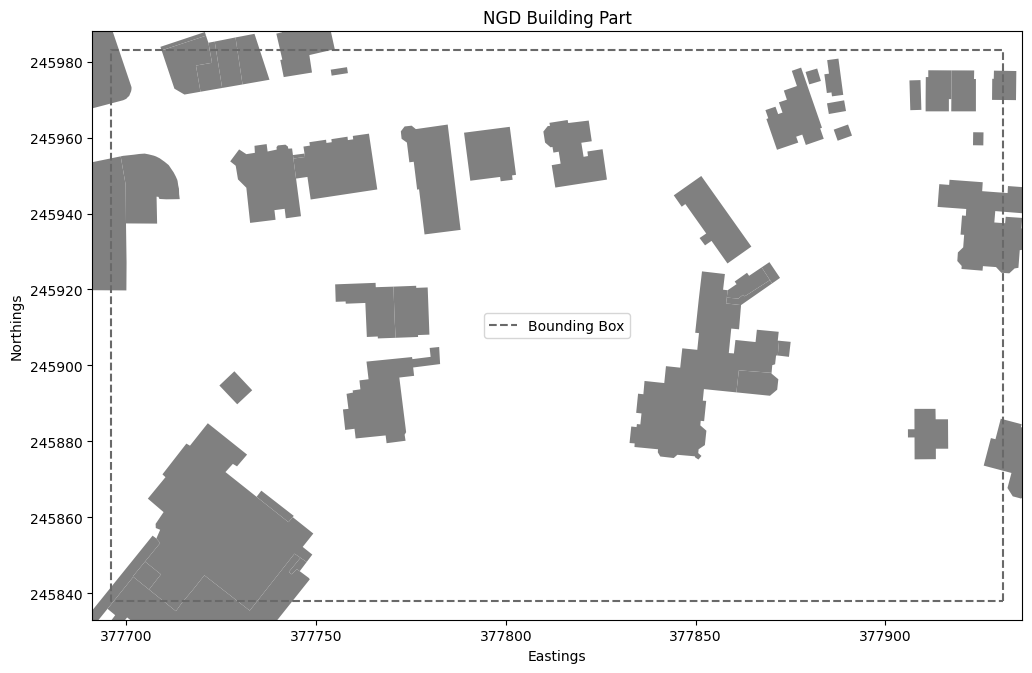

In [15]:
ax = bld_fts_gdf.plot(color="grey", figsize=(12, 10))

# Plot the query extent
ax.plot(*zip(*extent.polygon.exterior.coords), color="dimgray",
        linestyle='--', label="Bounding Box")

# Define limits of the plot
bounds = extent.polygon.bounds
# margin adds a bit of space around the bounding box
margin = 5
x_limits = (bounds[0] - margin, bounds[2] + margin)
y_limits = (bounds[1] - margin, bounds[3] + margin)
ax.set_xlim(*x_limits)
ax.set_ylim(*y_limits)

# Add labels
ax.set_xlabel("Eastings")
ax.set_ylabel("Northings")
ax.set_title("NGD Building Part")
plt.legend()
plt.show()